<a href="https://colab.research.google.com/github/jsansao/teic-20231/blob/main/TEIC_Tarefa1_ClassificacaoBinaria_Cluster3d_Solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa 1 - Classificação Binária - Cluster 3D [Solução]

Utilizaremos um dataset sintético balanceado com duas classes, agora em 3 dimensões. 

Vamos comparar o desempenho da regressão logística, das SVM e uma rede neural de camada simples.

In [ ]:
!wget https://raw.githubusercontent.com/jsansao/idl/main/cluster_data.csv
!wget https://raw.githubusercontent.com/jsansao/idl/main/cluster_label.csv



from numpy import genfromtxt
cluster_data = genfromtxt('cluster_data.csv', delimiter=',')
cluster_label = genfromtxt('cluster_label.csv', delimiter=',')


--2023-04-25 19:06:45--  https://raw.githubusercontent.com/jsansao/idl/main/cluster_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2269907 (2.2M) [text/plain]
Saving to: ‘cluster_data.csv’

cluster_data.csv    100%[===================>]   2.16M  --.-KB/s    in 0.07s   

2023-04-25 19:06:45 (30.0 MB/s) - ‘cluster_data.csv’ saved [2269907/2269907]

--2023-04-25 19:06:45--  https://raw.githubusercontent.com/jsansao/idl/main/cluster_label.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80000 (78K) [text/plain]
Saving to:

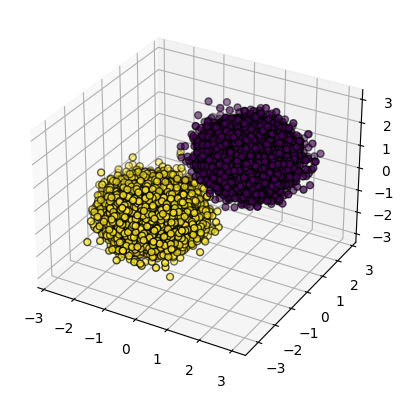

In [ ]:
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], marker="o", c= cluster_label, s=25, edgecolor="k")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(cluster_data, cluster_label)



## Questões:

1. Determine os coeficientes de regressão logística e acurácia do classificador, para os dados de treinamento e teste. 
2. Execute o mesmo treinamento de uma SVM. 
3. Idem para uma rede neural de uma única camada.


## Regressão Logística


In [ ]:


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)


log_reg.intercept_,log_reg.coef_

     


(array([0.01489625]), array([[-5.39330504, -4.83835567, -5.05923737]]))

In [ ]:


 from sklearn.metrics import accuracy_score

 y_pred = log_reg.predict(X_test)

 accuracy_score(y_test, y_pred)
     


0.9997

## SVM



In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear", C=0.1)
svm_clf.fit(X_train, y_train)


y_pred = svm_clf.predict(X_test)


svm_clf.intercept_, svm_clf.coef_ 

(array([-0.02580838]), array([[-1.45138419, -1.42882893, -1.5114879 ]]))

In [ ]:
accuracy_score(y_test, y_pred)


0.9996

## Rede neural monocamada

In [ ]:

import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, activation=tf.nn.sigmoid, input_shape=[3])])
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))



model.summary()

Epoch 1/50
938/938 [==============================] - 4s 4ms/step - loss: 0.0416 - accuracy: 0.9969 - val_loss: 0.0194 - val_accuracy: 0.9990
Epoch 2/50
938/938 [==============================] - 3s 4ms/step - loss: 0.0145 - accuracy: 0.9995 - val_loss: 0.0113 - val_accuracy: 0.9994
Epoch 3/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0095 - accuracy: 0.9997 - val_loss: 0.0082 - val_accuracy: 0.9995
Epoch 4/50
938/938 [==============================] - 6s 6ms/step - loss: 0.0073 - accuracy: 0.9998 - val_loss: 0.0066 - val_accuracy: 0.9995
Epoch 5/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0060 - accuracy: 0.9998 - val_loss: 0.0056 - val_accuracy: 0.9995
Epoch 6/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0051 - accuracy: 0.9998 - val_loss: 0.0049 - val_accuracy: 0.9997
Epoch 7/50
938/938 [==============================] - 3s 3ms/step - loss: 0.0045 - accuracy: 0.9998 - val_loss: 0.0044 - val_accuracy: 0.9996
Epoch 

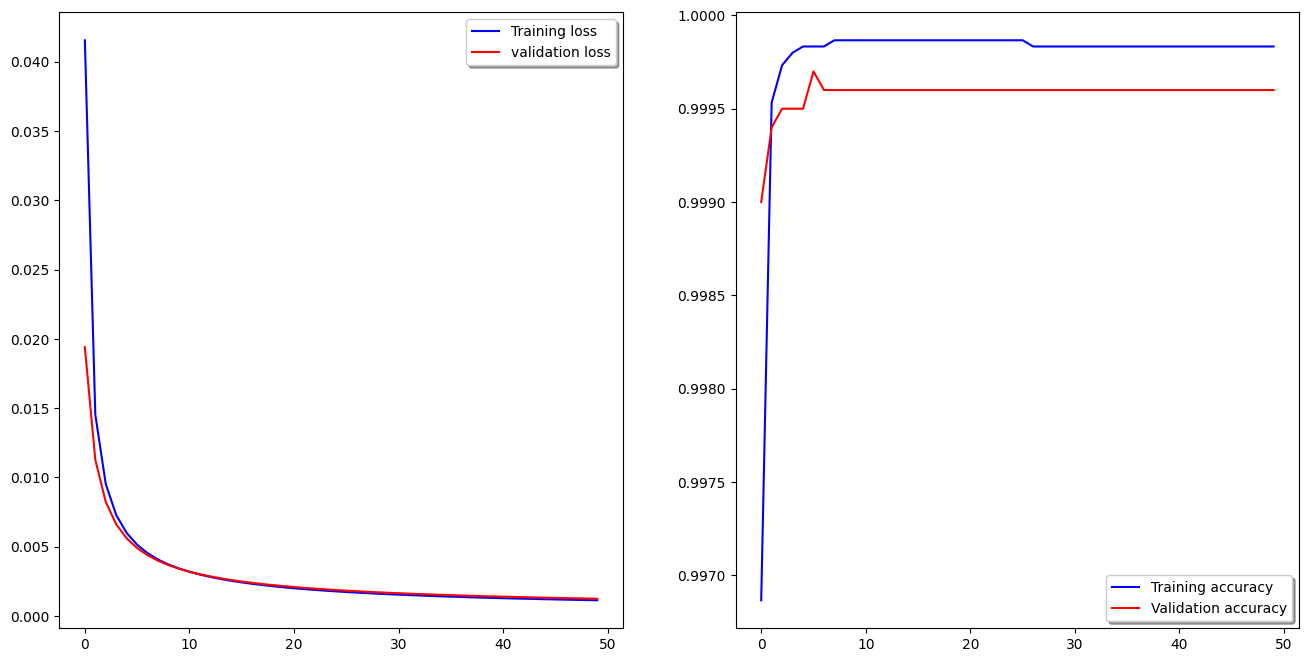

In [ ]:


fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


     


In [ ]:
pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.8/466.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 13.5 MB/s eta 0:00:00


## AutoKeras


In [ ]:

import tensorflow as tf

import autokeras as ak

In [ ]:
# It tries 10 different models.
clf = ak.StructuredDataClassifier(overwrite=True, max_trials=3)
# Feed the structured data classifier with training data.
clf.fit(X_train, y_train, epochs=10)
# Predict with the best model.
predicted_y = clf.predict(X_test)
# Evaluate the best model with testing data.
print(clf.evaluate(X_test, y_test))


Trial 3 Complete [00h 00m 36s]
val_accuracy: 0.9998324513435364

Best val_accuracy So Far: 0.9998324513435364
Total elapsed time: 00h 01m 50s
Epoch 1/10
938/938 [==============================] - 5s 4ms/step - loss: 0.0469 - accuracy: 0.9897
Epoch 2/10
938/938 [==============================] - 2s 3ms/step - loss: 6.5780e-04 - accuracy: 0.9999
Epoch 3/10
938/938 [==============================] - 2s 3ms/step - loss: 4.8577e-04 - accuracy: 0.9999
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 4.4595e-04 - accuracy: 0.9999
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 4.3128e-04 - accuracy: 0.9999
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 4.1792e-04 - accuracy: 0.9999
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 4.0346e-04 - accuracy: 0.9999
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 3.8786e-04 - accuracy: 0.9999
Epoch 9/10
938/938 [==========

313/313 [==============================] - 1s 2ms/step - loss: 6.4361e-04 - accuracy: 0.9998
[0.0006436088588088751, 0.9998000264167786]


In [ ]:
model_AutoKeras = clf.export_model()
model_AutoKeras.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 multi_category_encoding (Mu  (None, 3)                0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 3)                7         
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                128       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056  